# Customer Segmentation

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, OrdinalEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [392]:
df1 = pd.read_csv('./Kaggle_data/Train.csv')
df2 = pd.read_csv('./Kaggle_data/Test.csv')
df = pd.concat([df1,df2])

In [393]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [394]:
df.shape

(10695, 11)

In [395]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,10695.000000,10695.000000,9597.000000,10247.000000
mean,463468.088640,43.511828,2.619777,2.844052
std,2600.966411,16.774158,3.390790,1.536427
min,458982.000000,18.000000,0.000000,1.000000
25%,461220.500000,30.000000,0.000000,2.000000
50%,463451.000000,41.000000,1.000000,3.000000
75%,465733.500000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


# Checking missing values

In [396]:
df.isna().sum()

ID                    0
Gender                0
Ever_Married        190
Age                   0
Graduated           102
Profession          162
Work_Experience    1098
Spending_Score        0
Family_Size         448
Var_1               108
Segmentation          0
dtype: int64

In [397]:
df.drop(df.index[df.Profession.isnull()], inplace=True)
df.drop(df.index[df.Var_1.isnull()], inplace=True)

df.shape

(10295, 11)

For the 'Graduation', 'Work_Experience' and 'Ever_Married' columns, we'll impute values according with the customer's age.

In [398]:
# 'Ever_Married' column

for row in df.iterrows():
    if pd.isna(row[1]['Ever_Married']):
        
        age = row[1]['Age']
        id_ = row[1]['ID']
        
        value = df.loc[df.Age == age, 'Ever_Married'].value_counts().index[0]
        df.loc[df.ID == id_, 'Ever_Married'] = value

In [399]:
df.Ever_Married.isna().sum()

0

In [400]:
# 'Graduated' column

for row in df.iterrows():
    if pd.isna(row[1]['Graduated']):
        
        age = row[1]['Age']
        id_ = row[1]['ID']
        
        value = df.loc[df.Age == age, 'Graduated'].value_counts().index[0]
        df.loc[df.ID == id_, 'Graduated'] = value

In [401]:
df.Graduated.isna().sum()

0

In [402]:
# 'Work_Experience' column

for row in df.iterrows():
    if pd.isna(row[1]['Work_Experience']):
        
        age = row[1]['Age']
        id_ = row[1]['ID']
        
        value = df.loc[df.Age == age, 'Work_Experience'].value_counts().index[0]
        df.loc[df.ID == id_, 'Work_Experience'] = value

In [403]:
df.Work_Experience.isna().sum()

0

In [404]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10295 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10295 non-null  int64  
 1   Gender           10295 non-null  object 
 2   Ever_Married     10295 non-null  object 
 3   Age              10295 non-null  int64  
 4   Graduated        10295 non-null  object 
 5   Profession       10295 non-null  object 
 6   Work_Experience  10295 non-null  float64
 7   Spending_Score   10295 non-null  object 
 8   Family_Size      9883 non-null   float64
 9   Var_1            10295 non-null  object 
 10  Segmentation     10295 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 965.2+ KB


In [405]:
imputer = SimpleImputer(strategy='median')
imputer.fit(df.Family_Size.values.reshape(-1, 1))

SimpleImputer(strategy='median')

In [406]:
df.Family_Size = imputer.transform(df.Family_Size.values.reshape(-1,1))

In [407]:
df_copy = df.copy()

In [408]:
df_copy.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,0.0,Average,3.0,Cat_4,A
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C


In [409]:
df.isna().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

# Encoding

In [410]:

onehot = OneHotEncoder(drop='if_binary', sparse=False)

In [411]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,0.0,Average,3.0,Cat_4,A
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C


In [412]:
df['Gender'] = onehot.fit_transform(df.Gender.values.reshape(-1, 1))
df['Ever_Married'] = onehot.fit_transform(df.Ever_Married.values.reshape(-1, 1))
df['Graduated'] = onehot.fit_transform(df.Graduated.values.reshape(-1, 1))

In [413]:
ord_Spending = OrdinalEncoder(categories=[['Low', 'Average', 'High']])


In [414]:
df['Spending_Score'] = ord_Spending.fit_transform(df.Spending_Score.values.reshape(-1, 1))

In [415]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1.0,0.0,22,0.0,Healthcare,1.0,0.0,4.0,Cat_4,D
1,462643,0.0,1.0,38,1.0,Engineer,0.0,1.0,3.0,Cat_4,A
3,461735,1.0,1.0,67,1.0,Lawyer,0.0,2.0,2.0,Cat_6,B
4,462669,0.0,1.0,40,1.0,Entertainment,1.0,2.0,6.0,Cat_6,A
5,461319,1.0,1.0,56,0.0,Artist,0.0,1.0,2.0,Cat_6,C


# Dummy variables

In [416]:
df = pd.get_dummies(df, dtype='float64')

# Scaling 

In [417]:
scaler = MinMaxScaler()
df[df.columns] = scaler.fit_transform(df)

In [418]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,...,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation_A,Segmentation_B,Segmentation_C,Segmentation_D
0,0.425601,1.0,0.0,0.056338,0.0,0.071429,0.0,0.375,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.407140,0.0,1.0,0.281690,1.0,0.000000,0.5,0.250,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.306161,1.0,1.0,0.690141,1.0,0.000000,1.0,0.125,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.410031,0.0,1.0,0.309859,1.0,0.071429,1.0,0.625,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,0.259898,1.0,1.0,0.535211,0.0,0.000000,0.5,0.125,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [419]:
df.drop('ID', axis=1, inplace=True)

In [420]:
df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation_A,Segmentation_B,Segmentation_C,Segmentation_D
0,1.0,0.0,0.056338,0.0,0.071429,0.0,0.375,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.281690,1.0,0.000000,0.5,0.250,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,1.0,0.690141,1.0,0.000000,1.0,0.125,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.309859,1.0,0.071429,1.0,0.625,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
5,1.0,1.0,0.535211,0.0,0.000000,0.5,0.125,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


# Modeling

In [421]:
pca = PCA(n_components = 2)

pca_data = pca.fit_transform(df)

In [422]:
pca_df = pd.DataFrame(pca_data, columns=['PCA1', 'PCA2'])

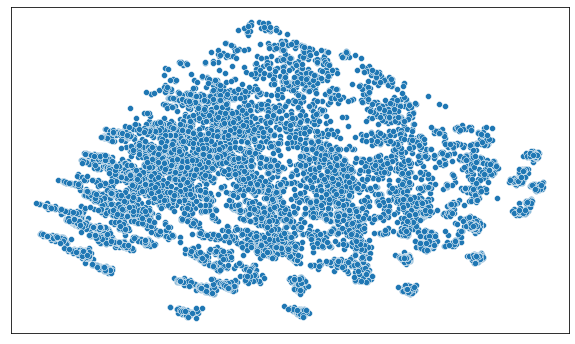

In [423]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', ax=ax)

ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)


plt.show()

# Finding number of clusters (Elbow Method)

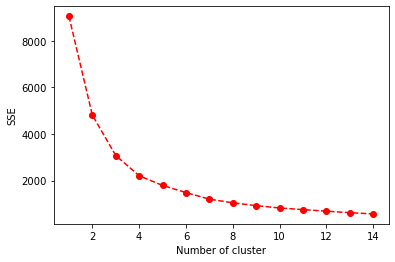

In [424]:
sse = {}
for k in range(1, 15):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(pca_data)
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
ax.plot(range(1, 15), linestyle = '--', marker='o')
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), linestyle = '--', marker='o', c = 'r')
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

Here, number of clusters = 4

In [425]:
pca_data = PCA(n_components=2).fit_transform(df)
kmeans = KMeans(init='k-means++', n_clusters=4, n_init=10)
kmeans.fit(pca_data)

KMeans(n_clusters=4)

In [426]:
labels = kmeans.labels_

In [427]:
mapping = {0: 'A', 1: 'B', 2: 'C', 3: 'D'}

labels_mapping = [mapping[val] for val in labels]

In [428]:
pca_df['Clusters'] = labels_mapping
df['Clusters'] = labels_mapping

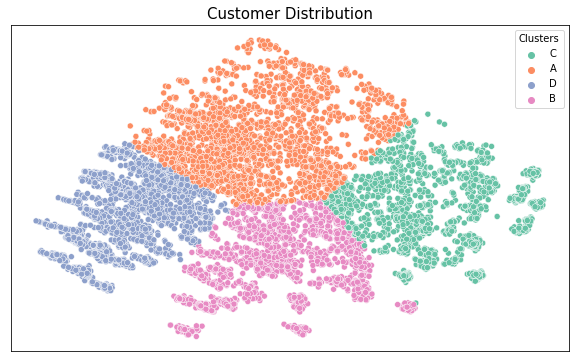

In [429]:
fig, ax = plt.subplots(figsize=(10, 6))

sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Clusters', ax=ax, palette='Set2')

ax.set_title('Customer Distribution', fontsize=15)

ax.yaxis.set_visible(False)
ax.xaxis.set_visible(False)


plt.savefig('customer_distribution.png')

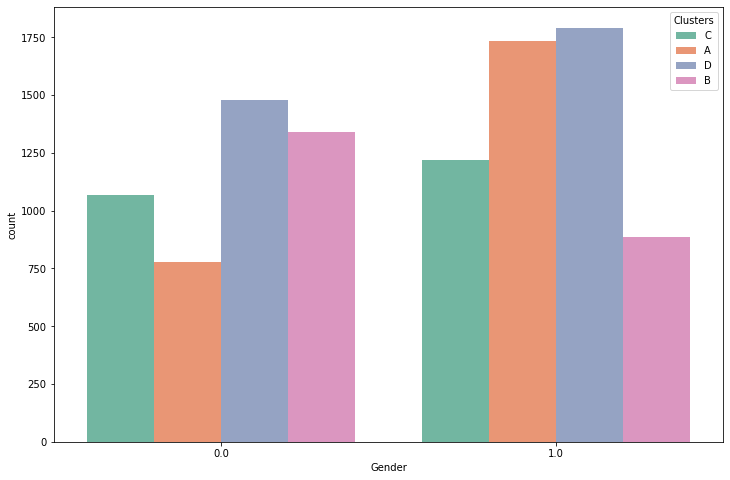

In [430]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.countplot(x=df['Gender'], hue=labels_mapping, palette='Set2')


plt.legend(loc="upper right", title='Clusters')
plt.show()

In [431]:
df.head()

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation_A,Segmentation_B,Segmentation_C,Segmentation_D,Clusters
0,1.0,0.0,0.056338,0.0,0.071429,0.0,0.375,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,C
1,0.0,1.0,0.281690,1.0,0.000000,0.5,0.250,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,A
3,1.0,1.0,0.690141,1.0,0.000000,1.0,0.125,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,D
4,0.0,1.0,0.309859,1.0,0.071429,1.0,0.625,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,D
5,1.0,1.0,0.535211,0.0,0.000000,0.5,0.125,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,D


On the left side are Males, on the right side are Females

In [432]:
df_copy.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,0.0,Average,3.0,Cat_4,A
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,C


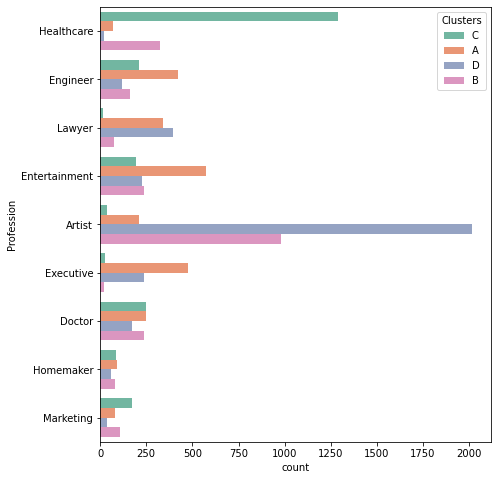

In [433]:
fig, ax = plt.subplots(figsize=(7, 8))
sns.countplot(y=df_copy['Profession'], hue=labels_mapping, palette='Set2')

plt.legend(title='Clusters')
plt.show()

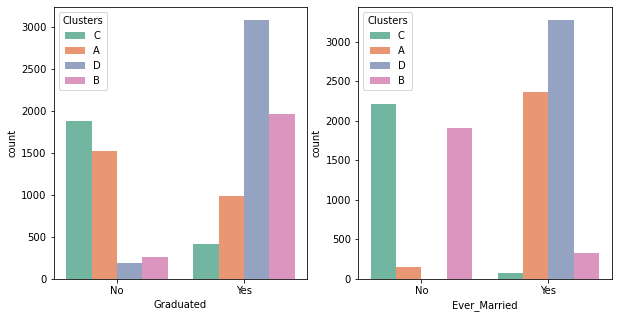

In [434]:
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))

sns.countplot(x=df_copy['Graduated'], hue=labels_mapping, palette='Set2', ax=ax[0])
sns.countplot(x=df_copy['Ever_Married'], hue=labels_mapping, palette='Set2', ax=ax[1])

ax[0].legend(title='Clusters')
ax[1].legend(title='Clusters')
plt.show()

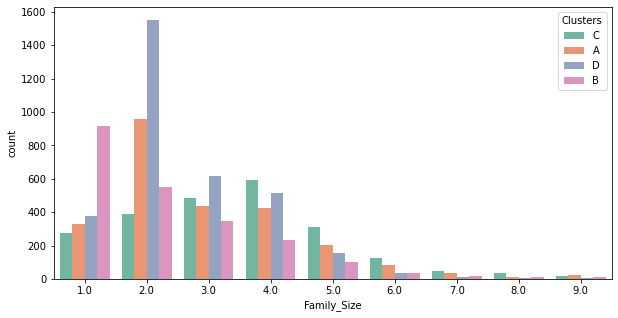

In [435]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot( x=df_copy['Family_Size'], hue=labels_mapping, palette='Set2')
plt.legend(title='Clusters')
plt.show()

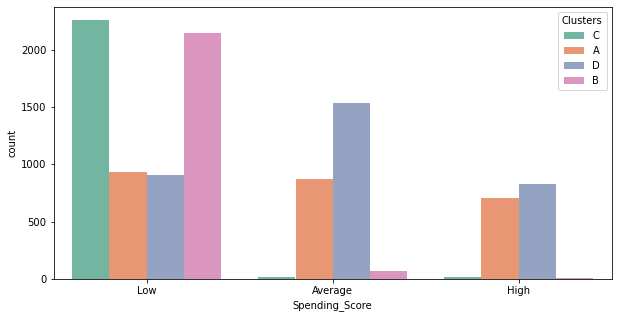

In [438]:
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(x=df_copy['Spending_Score'], hue=labels_mapping, palette='Set2')
plt.legend(title='Clusters')

plt.show()

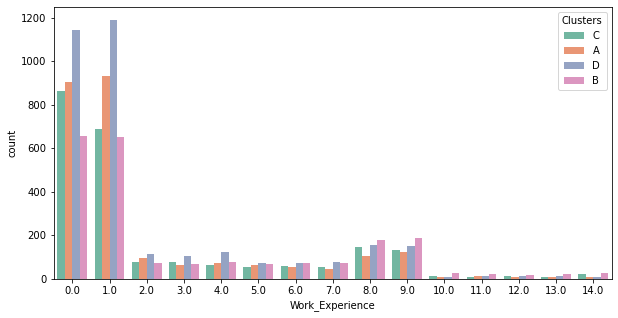

In [439]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.countplot(x=df_copy['Work_Experience'], hue=labels_mapping, palette='Set2')
plt.legend(title='Clusters')

plt.show()

# Conclusion

Cluster A
Predominantly composed of artists.
Essentially, all clients in this group have been married at least once and are graduates.

Cluster B
No other cluster is composed of more healthcare professionals than Cluster B.
Typically comprised of individuals who have never been married and are not graduates.
Generally, younger individuals are part of this group.
Primarily composed of individuals with a low level of company expenditures.

Cluster C
Predominantly composed of individuals with low expenditures.
Individuals who have never been married.
A high proportion of artists and graduates.

Cluster D
Primarily composed of individuals who have been married at least once.
Generally comprised of older individuals.

Significant balance in other variables, such as expenditure levels, family size, years of experience, diverse professions, etc